# Part A

#### DOMAIN: 
Electronics and Telecommunication

#### CONTEXT: 
A communications equipment manufacturing company has a product which is responsible for emitting informative signals.
Company wants to build a machine learning model which can help the company to predict the equipment’s signal quality using various
parameters.

#### DATA DESCRIPTION: 

The data set contains information on various signal tests performed:
1. Parameters: Various measurable signal parameters.
2. Signal_Quality: Final signal strength or quality

#### PROJECT OBJECTIVE: 
To build a classifier which can use the given parameters to determine the signal strength or quality.

### Steps and tasks: [ Total Score: 30 Marks]

#### 1. Data import and Understanding [10 Marks]

#### A. Read the ‘Signals.csv’ as DataFrame and import required libraries. [2 Marks]

Importing required packages

In [1]:
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import h5py
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import losses
from tensorflow.keras import optimizers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

Reading Signal.csv

In [2]:
df_signal = pd.read_csv('Signal.csv')

Explore dataset

In [3]:
df_signal.head()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df_signal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1599 non-null   float64
 1   Parameter 2      1599 non-null   float64
 2   Parameter 3      1599 non-null   float64
 3   Parameter 4      1599 non-null   float64
 4   Parameter 5      1599 non-null   float64
 5   Parameter 6      1599 non-null   float64
 6   Parameter 7      1599 non-null   float64
 7   Parameter 8      1599 non-null   float64
 8   Parameter 9      1599 non-null   float64
 9   Parameter 10     1599 non-null   float64
 10  Parameter 11     1599 non-null   float64
 11  Signal_Strength  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
print('There are', df_signal.shape[0],'rows and', df_signal.shape[1], 'columns in df_signal Dataframe.')

There are 1599 rows and 12 columns in df_signal Dataframe.


#### B. Check for missing values and print percentage for each attribute. [2 Marks]

In [6]:
count_missing = (df_signal.isnull() | df_signal.isna()).sum()
count_missing

Parameter 1        0
Parameter 2        0
Parameter 3        0
Parameter 4        0
Parameter 5        0
Parameter 6        0
Parameter 7        0
Parameter 8        0
Parameter 9        0
Parameter 10       0
Parameter 11       0
Signal_Strength    0
dtype: int64

- As seen from above, there are no missing values in the dataset given

In [7]:
percent_missing = (df_signal.isnull() | df_signal.isna()).sum() * 100 / df_signal.index.size
percent_missing

Parameter 1        0.0
Parameter 2        0.0
Parameter 3        0.0
Parameter 4        0.0
Parameter 5        0.0
Parameter 6        0.0
Parameter 7        0.0
Parameter 8        0.0
Parameter 9        0.0
Parameter 10       0.0
Parameter 11       0.0
Signal_Strength    0.0
dtype: float64

- Also, percentage of missing values in each of the parameter is 0%

#### C. Check for presence of duplicate records in the dataset and impute with appropriate method. [2 Marks]

In [8]:
print('There are', df_signal.duplicated().sum(), 'duplicate rows in the given dataset')

There are 240 duplicate rows in the given dataset


- Let's keep only the first occurance and drop other duplicate instances from the dataset

In [9]:
df_signal_clean = df_signal.drop_duplicates(keep="first", ignore_index=True)

In [10]:
df_signal_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1359 entries, 0 to 1358
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1359 non-null   float64
 1   Parameter 2      1359 non-null   float64
 2   Parameter 3      1359 non-null   float64
 3   Parameter 4      1359 non-null   float64
 4   Parameter 5      1359 non-null   float64
 5   Parameter 6      1359 non-null   float64
 6   Parameter 7      1359 non-null   float64
 7   Parameter 8      1359 non-null   float64
 8   Parameter 9      1359 non-null   float64
 9   Parameter 10     1359 non-null   float64
 10  Parameter 11     1359 non-null   float64
 11  Signal_Strength  1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 127.5 KB


In [11]:
print('There are', df_signal_clean.shape[0],'rows and', df_signal_clean.shape[1], 'columns in df_signal_clean Dataframe.')

There are 1359 rows and 12 columns in df_signal_clean Dataframe.


In [12]:
print('Number of rows reduced after this step compared to the original dataset', df_signal.shape[0] - df_signal_clean.shape[0])

Number of rows reduced after this step compared to the original dataset 240


#### D. Visualise distribution of the target variable. [2 Marks]

- Let's plot the histogram of the target variable to observe different counts of values of signal strength

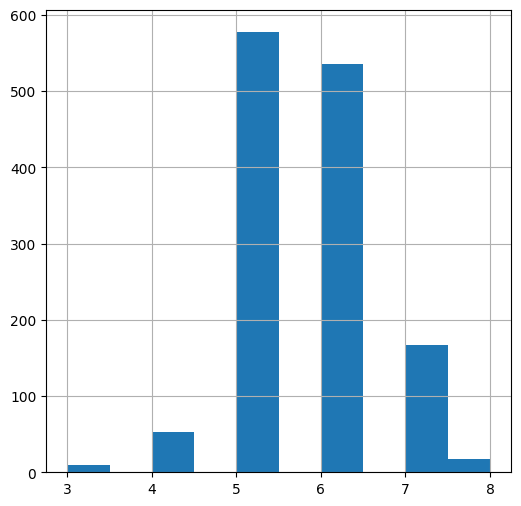

In [13]:
df_signal_clean['Signal_Strength'].hist(figsize = (6, 6))
plt.show()

- Signal Strength is distributed between 3 and 8 with maximum counts between 5 and 6.

In [14]:
df_signal_clean['Signal_Strength'].describe()

count    1359.000000
mean        5.623252
std         0.823578
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: Signal_Strength, dtype: float64

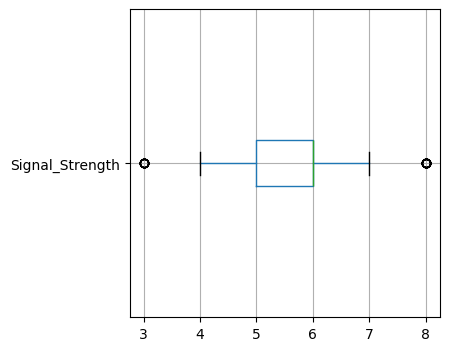

In [15]:
df_signal_clean.boxplot(column='Signal_Strength', figsize = (4, 4), vert=False)
plt.show()

#### E. Share insights from the initial data analysis (at least 2). [2 Marks]

- There are 11 parameters that influence the target variable, Signal Strength.
- There are no missing/NaN values in the dataset. 
- Initially, we had 1599 rows, but after removing 240 duplicate rows, we now have 1359 rows.
- The signal strength ranges from 3 to 8, with a median value of 6. The most common values are 5 and 6.
- Target variable is imbalanced, with more data for 5 and 6 and less data for 3, 4, 7 and 8.

Let's study the correlation of the attributes to the target variable

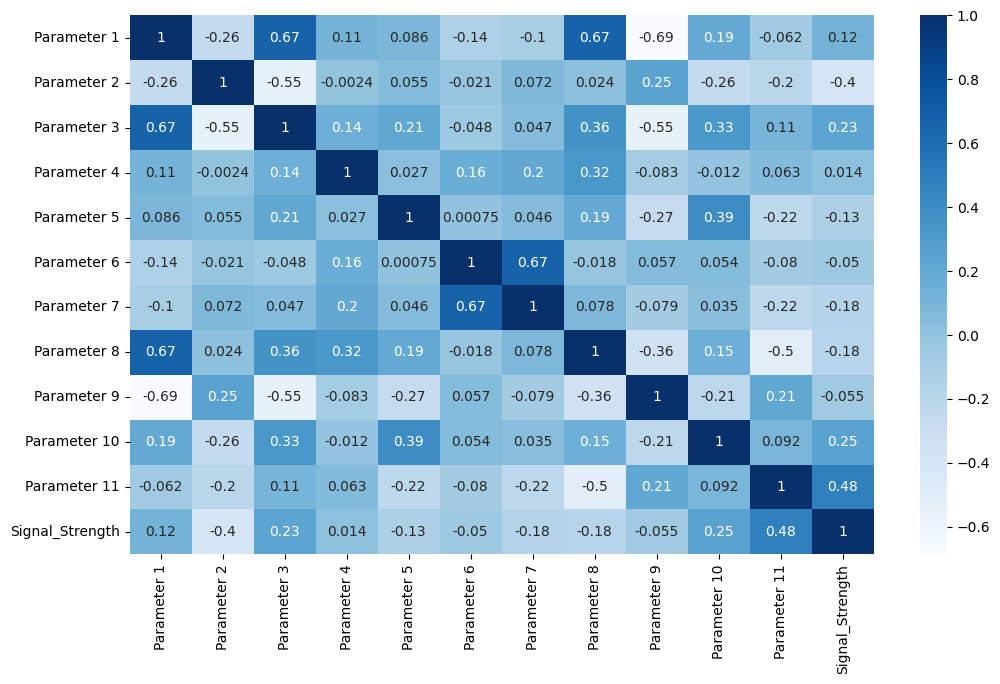

In [16]:
#Studying correlation between the attributes
plt.subplots(figsize =(12, 7));
sns.heatmap(df_signal_clean.corr(), annot=True, cmap='Blues');

#####  Correlation to Target variable

- Parameter 11 has a strong positive correlation to target variable Signal Strength
- Parameter 2 has a strong negative correlation to target variable Signal Strength
- Parameter 10 and Parameter 3 also has good positive correlation to Signal Strength
- Parameter 7 and Parameter 8 also has good negative correlation to Signal Strength

##### Correlation between variables

- Parameter 1 is highly correlated to Parameter 3, Parameter 8 and Parameter 9.
- Parameter 2 and 3 are highly correlated.
- Parameter 3 and 9 are highly correlated.
- Parameter 6 and 7 are highly correlated.

#### 2. Data preprocessing [7 Marks]

#### A. Split the data into X & Y. [1 Marks]

In [17]:
X = df_signal_clean.drop('Signal_Strength', axis=1)
Y = df_signal_clean['Signal_Strength']

- The predictors are grouped under the variable X.
- The target attribute is represented by Y.

#### B. Split the data into train & test with 70:30 proportion.[1 Marks]

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.30, random_state=1, stratify=Y)

- The data has been divided into a 70:30 split, ensuring equal distribution through stratification.

#### C. Print shape of all the 4 variables and verify if train and test data is in sync. [1 Marks]

In [19]:
print("X_train.shape: ", X_train.shape, "X_test.shape: ", X_test.shape, "Y_train.shape: ", Y_train.shape, "Y_test.shape: ", Y_test.shape)

X_train.shape:  (951, 11) X_test.shape:  (408, 11) Y_train.shape:  (951,) Y_test.shape:  (408,)


- There are 951 rows in the training set and 408 rows in test set, we see that split is in sync

#### D. Normalise the train and test data with appropriate method. [2 Marks]

- Use StandardScaler to normalise the training and testing data

In [20]:
# Fit and transform training data

scaler = StandardScaler()
d = scaler.fit_transform(X_train)
X_train_norm = pd.DataFrame(d, columns=X_train.columns)
X_train_norm

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11
0,1.402648,-0.150966,0.971389,-0.026726,-0.318863,-1.029546,-0.578278,1.825417,-1.688235,-0.109826,-0.861111
1,0.257556,-0.706894,0.662515,-0.240913,-0.185844,0.336751,0.174367,0.682066,0.856778,-0.109826,-1.142107
2,-1.288319,1.044280,-0.881856,0.044669,-0.762259,-0.248805,-0.578278,-1.702638,1.705115,-0.970467,1.386859
3,0.085792,-1.374008,1.486179,-0.526496,0.102363,1.898233,1.709761,0.083168,-0.056817,0.566391,0.075543
4,-0.944792,-1.374008,0.044767,-0.098122,-1.671221,1.995825,1.619444,-3.325107,-0.317844,-1.646685,1.199528
...,...,...,...,...,...,...,...,...,...,...,...
946,0.429319,-1.262823,0.353641,-0.383704,-0.518391,-0.346397,-0.638489,-0.864180,-0.317844,1.119660,1.199528
947,0.543829,0.710723,-0.058191,-0.383704,0.191043,-1.029546,-0.337432,0.344505,-0.383100,-1.462262,-0.767446
948,1.173630,0.265980,1.743574,0.044669,-0.252353,-0.443990,-0.668595,1.770972,-0.970411,0.197545,-1.329438
949,-0.715773,0.849705,-1.396646,-0.240913,-0.318863,-0.346397,-0.728807,0.083168,1.117805,-0.970467,-1.048442


In [21]:
# Transform testing data

d = scaler.transform(X_test)
X_test_norm = pd.DataFrame(d, columns=X_test.columns)
X_test_norm

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11
0,2.032449,-0.706894,1.949490,-0.276611,-0.429712,-0.834360,-0.578278,1.117628,-1.622978,0.136071,0.824866
1,-0.200482,-1.540787,0.816952,-0.597891,-0.451882,0.629529,0.114155,-1.169074,0.465237,-0.355724,1.386859
2,2.490486,0.404963,1.125826,0.187460,-0.274523,-1.029546,-0.819124,1.444300,-1.100924,-0.540147,0.918532
3,-0.028718,0.071406,-0.161149,0.615834,-0.252353,0.043973,1.980713,0.464285,-0.252587,-0.294249,-0.954777
4,-1.002046,1.099873,-0.933335,2.115141,0.656608,-0.639175,-0.879335,-0.107391,0.269467,-1.031941,0.356539
...,...,...,...,...,...,...,...,...,...,...,...
403,-0.544009,0.126998,-0.264107,-0.240913,0.412741,-0.346397,0.776482,-0.461285,-1.688235,-0.171301,-1.142107
404,-0.372245,0.460555,-0.470023,-0.098122,-0.097165,-0.931953,-0.789018,-0.243504,-0.122073,-0.355724,-0.205453
405,1.288139,-0.929266,1.640616,-0.240913,1.432552,-0.931953,-0.849230,1.008738,-1.753492,2.410621,-0.954777
406,-1.574593,0.432759,-1.139251,-0.098122,-0.318863,0.336751,-0.638489,-2.268869,1.639859,-0.663095,2.323513


#### E. Transform Labels into format acceptable by Neural Network [2 Marks]

- Convert to "one-hot" vectors using the to_categorical function
- Since the minimum value is 3 and there are no values for signal strength for 0, 1 and 2, we can normalise the output by reducing 3 from each value and keep the number of classes as 6.

In [22]:
num_classes = 6
Y_train_ints = Y_train - 3
Y_test_ints = Y_test - 3
Y_train_cat = to_categorical(Y_train_ints, num_classes)
Y_test_cat=to_categorical(Y_test_ints,num_classes)

In [23]:
print("First 5 training lables as one-hot encoded vectors:\n", Y_train_cat[:5])

First 5 training lables as one-hot encoded vectors:
 [[0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]]


#### 3. Model Training & Evaluation using Neural Network [13 Marks]

#### A. Design a Neural Network to train a classifier. [3 Marks]

- Since the dataset is small, let's design simple neural network to avoid overfitting to the training data and reduce the computational complexity

In [24]:
# clear session
keras.backend.clear_session()
# create model
model = Sequential()  

model.add(Dense(64, activation='relu',input_shape=(11,)))
model.add(Dense(32, activation='relu'))

model.add(Dense(num_classes, activation='softmax'))

In [25]:
# Compile model
adam = optimizers.Adam(learning_rate=1e-3)
model.compile(loss=losses.categorical_crossentropy, optimizer=adam, metrics=['accuracy'])

In [26]:
## Looking into our base model to understand layers and parameters
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │           198 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,046 (11.90 KB)

 Trainable params: 3,046 (11.90 KB)

 Non-trainable params: 0 (0.00 B)

#### B. Train the classifier using previously designed Architecture [2 Marks]

In [27]:
checkpoint = ModelCheckpoint("model.weights.h5",monitor='val_accuracy',save_weights_only=True, mode='max',verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss',factor=0.1,patience=2,min_lr=0.00001,model='auto')
callbacks = [checkpoint,reduce_lr]

In [28]:
# Fit the model
history=model.fit(X_train_norm, Y_train_cat, validation_data=(X_test_norm, Y_test_cat), epochs=30, batch_size=32, verbose=2,callbacks=callbacks)

Epoch 1/30

Epoch 1: saving model to model.weights.h5
30/30 - 0s - 13ms/step - accuracy: 0.4248 - loss: 1.4982 - val_accuracy: 0.4853 - val_loss: 1.3262 - learning_rate: 0.0010
Epoch 2/30

Epoch 2: saving model to model.weights.h5
30/30 - 0s - 1ms/step - accuracy: 0.5373 - loss: 1.1816 - val_accuracy: 0.5294 - val_loss: 1.1660 - learning_rate: 0.0010
Epoch 3/30

Epoch 3: saving model to model.weights.h5
30/30 - 0s - 1ms/step - accuracy: 0.5731 - loss: 1.0674 - val_accuracy: 0.5760 - val_loss: 1.0902 - learning_rate: 0.0010
Epoch 4/30

Epoch 4: saving model to model.weights.h5
30/30 - 0s - 1ms/step - accuracy: 0.5846 - loss: 1.0174 - val_accuracy: 0.5784 - val_loss: 1.0585 - learning_rate: 0.0010
Epoch 5/30

Epoch 5: saving model to model.weights.h5
30/30 - 0s - 1ms/step - accuracy: 0.5931 - loss: 0.9901 - val_accuracy: 0.5735 - val_loss: 1.0438 - learning_rate: 0.0010
Epoch 6/30

Epoch 6: saving model to model.weights.h5
30/30 - 0s - 1ms/step - accuracy: 0.5962 - loss: 0.9700 - val_acc

#### C. Plot 2 separate visuals. [3 Marks]
- Training Loss and Validation Loss
- Training Accuracy and Validation Accuracy

In [29]:
loss, accuracy  = model.evaluate(X_train_norm, Y_train_cat, verbose=False)

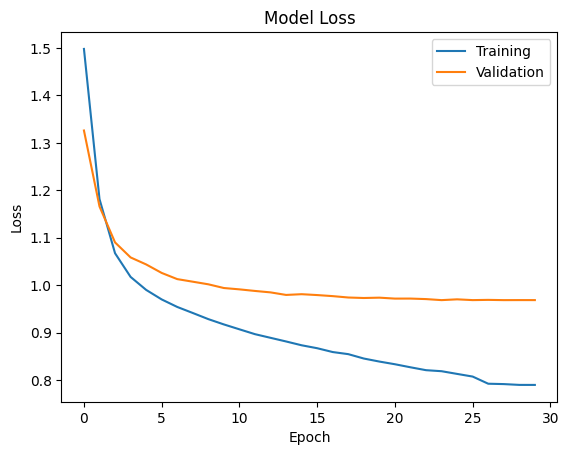

In [30]:
# Plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='best')
plt.show()

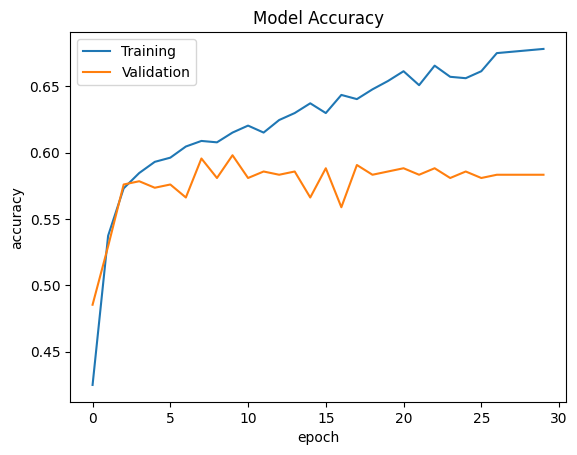

In [31]:
# Plot accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Training', 'Validation'], loc='best')
plt.show()

##### Classification Report of the Training Data

In [32]:
print(classification_report(model.predict(X_train_norm).argmax(axis=1), Y_train_cat.argmax(axis=1)))

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 759us/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.05      0.50      0.10         4
           2       0.78      0.71      0.75       444
           3       0.71      0.64      0.67       412
           4       0.52      0.67      0.59        91
           5       0.00      0.00      0.00         0

    accuracy                           0.68       951
   macro avg       0.34      0.42      0.35       951
weighted avg       0.72      0.68      0.70       951



##### Classification Report of the Testing Data

In [33]:
print(classification_report(model.predict(X_test_norm).argmax(axis=1), Y_test_cat.argmax(axis=1)))

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.06      0.33      0.11         3
           2       0.76      0.66      0.71       200
           3       0.55      0.54      0.55       164
           4       0.32      0.39      0.35        41
           5       0.00      0.00      0.00         0

    accuracy                           0.58       408
   macro avg       0.28      0.32      0.29       408
weighted avg       0.63      0.58      0.60       408



##### Confusion Matrix of the Testing Data

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step


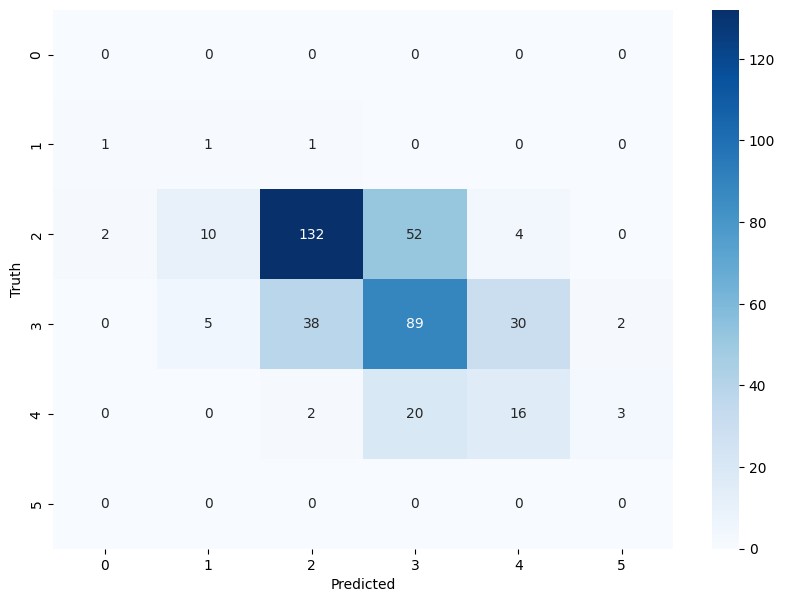

In [34]:
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(model.predict(X_test_norm).argmax(axis=1), Y_test_cat.argmax(axis=1)), annot=True, fmt='d', cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Truth');

#### D. Design new architecture/update existing architecture in attempt to improve the performance of the model. [2 Marks]

Add Batch Normalisation and Dropouts in attempt to improve accuracy, add more neurons to compensate for dropouts

In [35]:
# clear session
keras.backend.clear_session()
# create model
model = Sequential()  

model.add(Dense(128,input_shape=(11,)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Dense(num_classes, activation='softmax'))

In [36]:
# Compile model
adam = optimizers.Adam(learning_rate=1e-3)
model.compile(loss=losses.categorical_crossentropy, optimizer=adam, metrics=['accuracy'])

In [37]:
## Looking into our base model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 6)              │           198 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,966 (50.65 KB)

 Trainable params: 12,518 (48.90 KB)

 Non-trainable params: 448 (1.75 KB)

In [38]:
checkpoint = ModelCheckpoint("model.weights.h5",monitor='val_accuracy',save_weights_only=True, mode='max',verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss',factor=0.1,patience=2,min_lr=0.00001,model='auto')
callbacks = [checkpoint,reduce_lr]

In [39]:
# Fit the model
history=model.fit(X_train_norm, Y_train_cat, validation_data=(X_test_norm, Y_test_cat), epochs=30, batch_size=32, verbose=2,callbacks=callbacks)

Epoch 1/30

Epoch 1: saving model to model.weights.h5
30/30 - 1s - 29ms/step - accuracy: 0.2334 - loss: 2.0862 - val_accuracy: 0.4877 - val_loss: 1.6290 - learning_rate: 0.0010
Epoch 2/30

Epoch 2: saving model to model.weights.h5
30/30 - 0s - 2ms/step - accuracy: 0.3912 - loss: 1.7214 - val_accuracy: 0.5539 - val_loss: 1.4612 - learning_rate: 0.0010
Epoch 3/30

Epoch 3: saving model to model.weights.h5
30/30 - 0s - 2ms/step - accuracy: 0.4406 - loss: 1.5853 - val_accuracy: 0.5686 - val_loss: 1.3404 - learning_rate: 0.0010
Epoch 4/30

Epoch 4: saving model to model.weights.h5
30/30 - 0s - 2ms/step - accuracy: 0.4911 - loss: 1.4613 - val_accuracy: 0.5784 - val_loss: 1.2581 - learning_rate: 0.0010
Epoch 5/30

Epoch 5: saving model to model.weights.h5
30/30 - 0s - 2ms/step - accuracy: 0.5426 - loss: 1.3579 - val_accuracy: 0.5956 - val_loss: 1.1914 - learning_rate: 0.0010
Epoch 6/30

Epoch 6: saving model to model.weights.h5
30/30 - 0s - 2ms/step - accuracy: 0.5542 - loss: 1.2938 - val_acc

#### E. Plot visuals as in Q3.C and share insights about difference observed in both the models. [3 Marks]

In [40]:
loss, accuracy  = model.evaluate(X_train_norm, Y_train_cat, verbose=False)

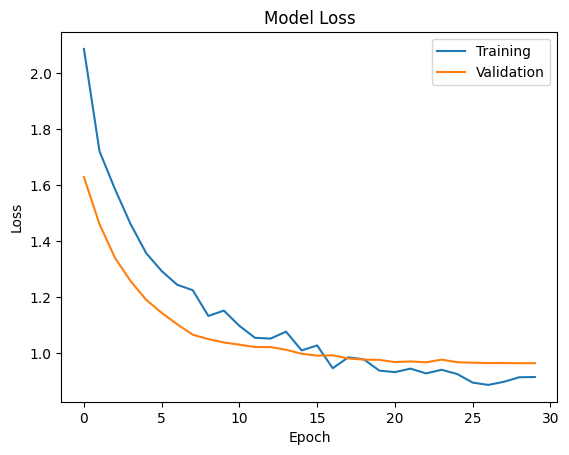

In [41]:
# Plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='best')
plt.show()

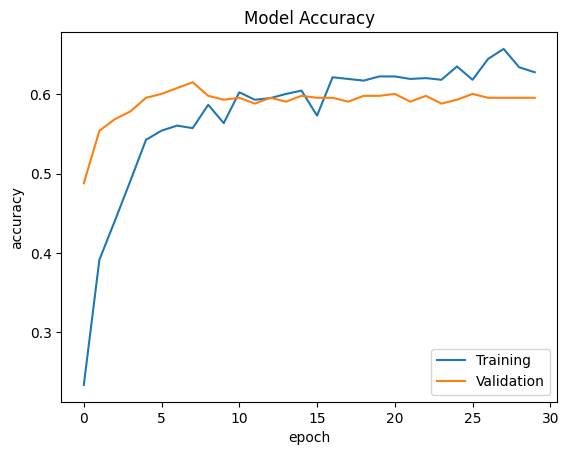

In [42]:
# Plot accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Training', 'Validation'], loc='best')
plt.show()

##### Classification Report of the Training Data

In [43]:
print(classification_report(model.predict(X_train_norm).argmax(axis=1), Y_train_cat.argmax(axis=1)))

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.03      0.25      0.05         4
           2       0.80      0.73      0.76       443
           3       0.76      0.64      0.70       439
           4       0.40      0.72      0.52        65
           5       0.00      0.00      0.00         0

    accuracy                           0.69       951
   macro avg       0.33      0.39      0.34       951
weighted avg       0.75      0.69      0.71       951



##### Classification Report of the Testing Data

In [44]:
print(classification_report(model.predict(X_test_norm).argmax(axis=1), Y_test_cat.argmax(axis=1)))

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         1
           2       0.75      0.64      0.69       202
           3       0.63      0.56      0.59       181
           4       0.24      0.50      0.32        24
           5       0.00      0.00      0.00         0

    accuracy                           0.60       408
   macro avg       0.27      0.28      0.27       408
weighted avg       0.66      0.60      0.62       408



##### Confusion Matrix of the Testing Data

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 515us/step


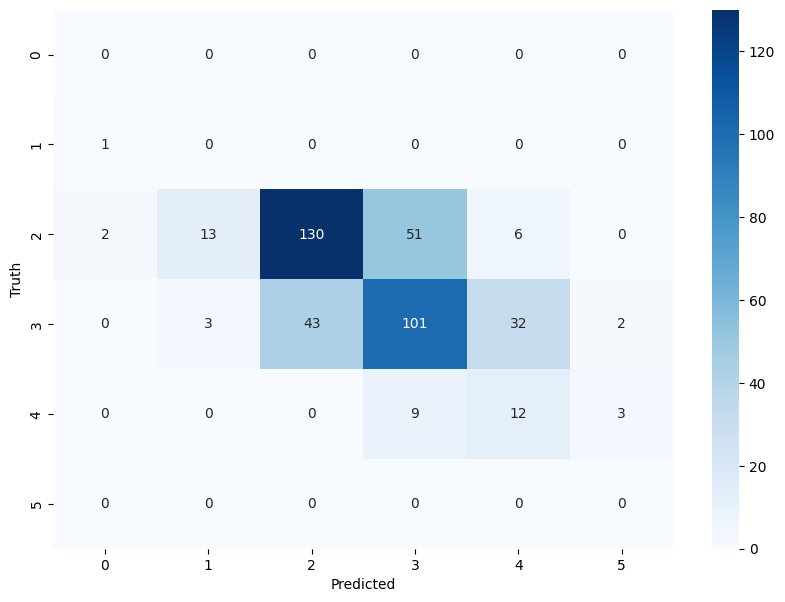

In [45]:
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(model.predict(X_test_norm).argmax(axis=1), Y_test_cat.argmax(axis=1)), annot=True, fmt='d', cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Truth');

#### Summary

1. We can observe from our both models that model with batch normalization and dropout is performing similar in terms of misclassifications.
2. However, the accuracy curve for train and validation shows that our model with dropout and batch normalization is much less of an overfit.
3. We achieved higher accuracy score on the training set from 68% to 69%, and also we achieved higher accuracy score of 58% to 60% for the validation set.

### Additional Exercise [Not asked in the project, just for exploration purpose only]

##### Since the data is imbalanced, we can apply oversampling technique to balance the data before feeding to Neural Network

In [46]:
df_signal_clean['Signal_Strength'].value_counts()

Signal_Strength
5    577
6    535
7    167
4     53
8     17
3     10
Name: count, dtype: int64

In [47]:
smtom = SMOTETomek(random_state=139)
X_train_res, Y_train_res= smtom.fit_resample(X_train_norm, Y_train_cat)
X_train_res.shape, Y_train_res.shape

((2326, 11), (2326, 6))

In [48]:
unique, counts = np.unique(Y_train_res.argmax(axis=1), return_counts=True)
print(np.asarray((unique, counts)).T)

[[  0 404]
 [  1 399]
 [  2 358]
 [  3 361]
 [  4 400]
 [  5 404]]


In [49]:
unique, counts = np.unique(Y_test_cat.argmax(axis=1), return_counts=True)
print(np.asarray((unique, counts)).T)

[[  0   3]
 [  1  16]
 [  2 173]
 [  3 161]
 [  4  50]
 [  5   5]]


In [50]:
# clear session
keras.backend.clear_session()
# create model
model = Sequential()  

model.add(Dense(128,input_shape=(11,)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Dense(num_classes, activation='softmax'))

In [51]:
# Compile model
adam = optimizers.Adam(learning_rate=1e-3)
model.compile(loss=losses.categorical_crossentropy, optimizer=adam, metrics=['accuracy'])

In [52]:
## Looking into our base model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 6)              │           198 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,966 (50.65 KB)

 Trainable params: 12,518 (48.90 KB)

 Non-trainable params: 448 (1.75 KB)

In [53]:
checkpoint = ModelCheckpoint("model.weights.h5",monitor='val_accuracy',save_weights_only=True, mode='max',verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss',factor=0.1,patience=2,min_lr=0.00001,model='auto')
callbacks = [checkpoint,reduce_lr]

In [54]:
# Again fit the model on the oversampled data
history=model.fit(X_train_res, Y_train_res, validation_data=(X_test_norm, Y_test_cat), epochs=30, batch_size=32, verbose=2,callbacks=callbacks)

Epoch 1/30

Epoch 1: saving model to model.weights.h5
73/73 - 1s - 12ms/step - accuracy: 0.3723 - loss: 1.7033 - val_accuracy: 0.3015 - val_loss: 1.6982 - learning_rate: 0.0010
Epoch 2/30

Epoch 2: saving model to model.weights.h5
73/73 - 0s - 1ms/step - accuracy: 0.4991 - loss: 1.2853 - val_accuracy: 0.3554 - val_loss: 1.5279 - learning_rate: 0.0010
Epoch 3/30

Epoch 3: saving model to model.weights.h5
73/73 - 0s - 1ms/step - accuracy: 0.5593 - loss: 1.1378 - val_accuracy: 0.3946 - val_loss: 1.4422 - learning_rate: 0.0010
Epoch 4/30

Epoch 4: saving model to model.weights.h5
73/73 - 0s - 1ms/step - accuracy: 0.6010 - loss: 1.0485 - val_accuracy: 0.3897 - val_loss: 1.3996 - learning_rate: 0.0010
Epoch 5/30

Epoch 5: saving model to model.weights.h5
73/73 - 0s - 1ms/step - accuracy: 0.6406 - loss: 0.9615 - val_accuracy: 0.4216 - val_loss: 1.3345 - learning_rate: 0.0010
Epoch 6/30

Epoch 6: saving model to model.weights.h5
73/73 - 0s - 1ms/step - accuracy: 0.6582 - loss: 0.9088 - val_acc

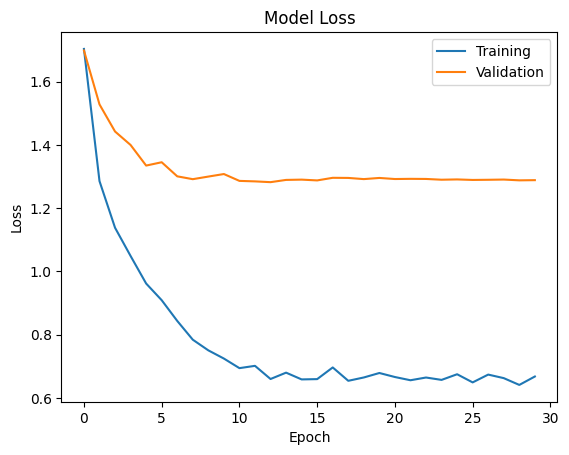

In [55]:
loss, accuracy  = model.evaluate(X_train_norm, Y_train_cat, verbose=False)
    
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='best')
plt.show()

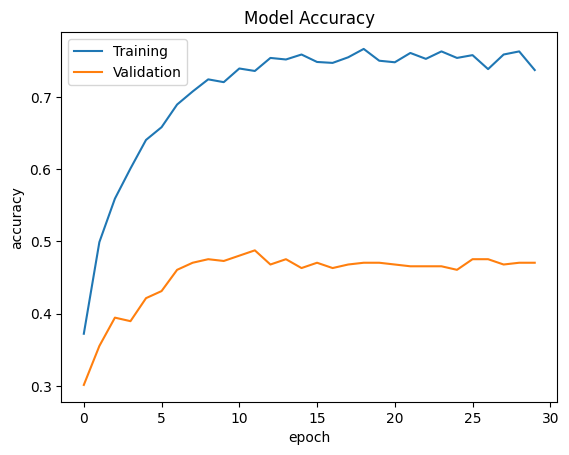

In [56]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Training', 'Validation'], loc='best')
plt.show()

In [57]:
print(classification_report(model.predict(X_train_norm).argmax(axis=1), Y_train_cat.argmax(axis=1)))

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
              precision    recall  f1-score   support

           0       1.00      0.47      0.64        15
           1       0.89      0.28      0.43       116
           2       0.65      0.72      0.68       366
           3       0.44      0.68      0.53       242
           4       0.78      0.50      0.61       182
           5       1.00      0.40      0.57        30

    accuracy                           0.60       951
   macro avg       0.79      0.51      0.58       951
weighted avg       0.67      0.60      0.60       951



In [58]:
print(classification_report(model.predict(X_test_norm).argmax(axis=1), Y_test_cat.argmax(axis=1)))

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.38      0.11      0.17        55
           2       0.58      0.66      0.62       153
           3       0.37      0.57      0.45       103
           4       0.50      0.37      0.43        67
           5       0.20      0.04      0.07        24

    accuracy                           0.47       408
   macro avg       0.34      0.29      0.29       408
weighted avg       0.46      0.47      0.44       408



13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step


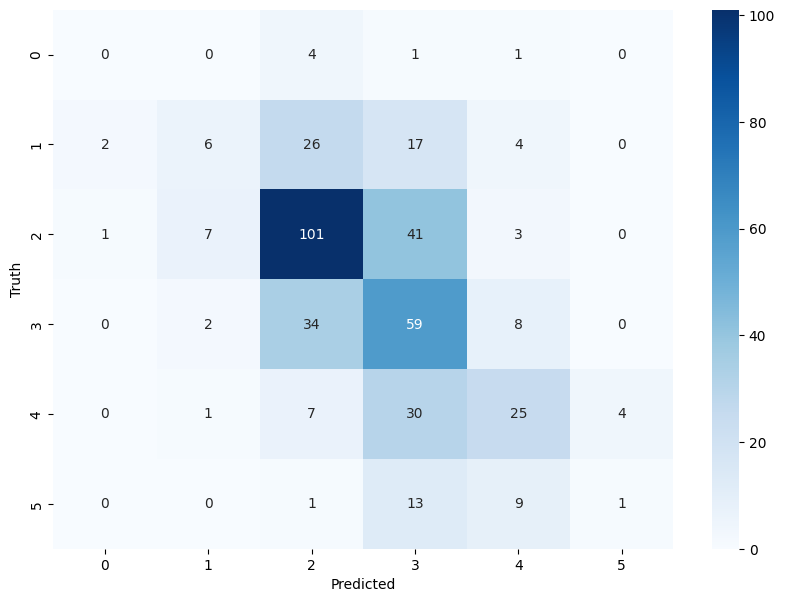

In [59]:
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(model.predict(X_test_norm).argmax(axis=1), Y_test_cat.argmax(axis=1)), annot=True, fmt='d', cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Truth');

#### Note

- Using data balancing techniques like SMOTE + TOMEK did not result in improved accuracy of the model and it actually decreased accuracy in test dataset to 47%

# Part B

#### DOMAIN: 

Autonomous Vehicles

#### CONTEXT: 

A Recognising multi-digit numbers in photographs captured at street level is an important component of modern-day map
making. A classic example of a corpus of such street-level photographs is Google’s Street View imagery composed of hundreds of millions
of geo-located 360-degree panoramic images.
The ability to automatically transcribe an address number from a geo-located patch of pixels and associate the transcribed number with a
known street address helps pinpoint, with a high degree of accuracy, the location of the building it represents. More broadly, recognising
numbers in photographs is a problem of interest to the optical character recognition community.
While OCR on constrained domains like document processing is well studied, arbitrary multi-character text recognition in photographs is
still highly challenging. This difficulty arises due to the wide variability in the visual appearance of text in the wild on account of a large
range of fonts, colours, styles, orientations, and character arrangements.
The recognition problem is further complicated by environmental factors such as lighting, shadows, specularity, and occlusions as well as
by image acquisition factors such as resolution, motion, and focus blurs. In this project, we will use the dataset with images centred around
a single digit (many of the images do contain some distractors at the sides). Although we are taking a sample of the data which is simpler,
it is more complex than MNIST because of the distractors.

#### DATA DESCRIPTION: 

The SVHN is a real-world image dataset for developing machine learning and object recognition algorithms with the
minimal requirement on data formatting but comes from a significantly harder, unsolved, real-world problem (recognising digits and
numbers in natural scene images). SVHN is obtained from house numbers in Google Street View images.
Where the labels for each of this image are the prominent number in that image i.e. 2,6,7 and 4 respectively.
The dataset has been provided in the form of h5py files. You can read about this file format here: https://docs.h5py.org/en/stable/
Acknowledgement: Yuval Netzer, Tao Wang, Adam Coates, Alessandro Bissacco, Bo Wu, Andrew Y. Ng Reading Digits in Natural Images with Unsupervised
Feature Learning NIPS Workshop on Deep Learning and Unsupervised Feature Learning 2011. PDF
http://ufldl.stanford.edu/housenumbers as the URL for this site.

#### PROJECT OBJECTIVE: 
To build a digit classifier on the SVHN (Street View Housing Number) dataset.

### Steps and tasks: [ Total Score: 30 Marks]

#### 1. Data Import and Exploration [5 Marks]

#### A. Read the .h5 file and assign to a variable. [2 Marks]

Reading the h5 file using h5py library

In [60]:
hf = h5py.File('Autonomous_Vehicles_SVHN_single_grey1.h5', 'r')

#### B. Print all the keys from the .h5 file. [1 Marks]

In [61]:
hf.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

#### C. Split the data into X_train, X_test, Y_train, Y_test [2 Marks]

There is training, validation and test sets provided. Let's retrieve all of them.

In [62]:
X_train = np.array(hf.get('X_train'))
X_val = np.array(hf.get('X_val'))
X_test = np.array(hf.get('X_test'))
y_train = np.array(hf.get('y_train'))
y_val = np.array(hf.get('y_val'))
y_test = np.array(hf.get('y_test'))

#### 2. Data Visualisation and preprocessing [13 Marks]

#### A. Print shape of all the 4 data split into x, y, train, test to verify if x & y is in sync. [1 Marks]

In [63]:
print("X_train.shape: ", X_train.shape, "X_val.shape: ", X_val.shape, "X_test.shape: ", X_test.shape)

X_train.shape:  (42000, 32, 32) X_val.shape:  (60000, 32, 32) X_test.shape:  (18000, 32, 32)


In [64]:
print("y_train.shape: ", y_train.shape, "y_val.shape: ", y_val.shape, "y_test.shape: ", y_test.shape)

y_train.shape:  (42000,) y_val.shape:  (60000,) y_test.shape:  (18000,)


#### B. Visualise first 10 images in train data and print its corresponding labels. [4 Marks]

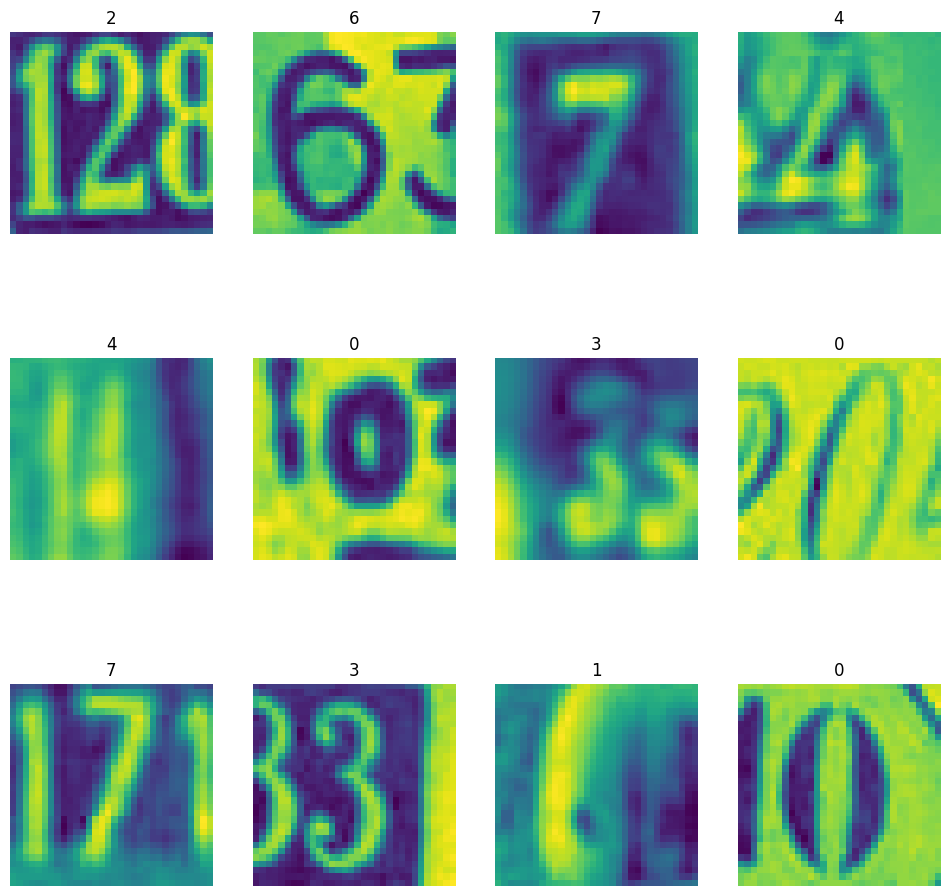

In [65]:
# Showing first 12 images

fig, m_axs = plt.subplots(3, 4, figsize = (12, 12), linewidth=0.5)
m_axs = m_axs.ravel()

for i in range(12):
    m_axs[i].imshow(X_train[i])
    m_axs[i].set_title(y_train[i])
    m_axs[i].axis("off")

#### C. Reshape all the images with appropriate shape update the data in same variable. [3 Marks]

In [66]:
# reshaping X data: (n, 32, 32) => (n, 1024)

X_train = X_train.reshape((X_train.shape[0], -1))
X_val = X_val.reshape((X_val.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))

In [67]:
print("X_train.shape: ", X_train.shape, "X_val.shape: ", X_val.shape, "X_test.shape: ", X_test.shape)

X_train.shape:  (42000, 1024) X_val.shape:  (60000, 1024) X_test.shape:  (18000, 1024)


In [68]:
print("y_train.shape: ", y_train.shape, "y_val.shape: ", y_val.shape, "y_test.shape: ", y_test.shape)

y_train.shape:  (42000,) y_val.shape:  (60000,) y_test.shape:  (18000,)


#### D. Normalise the images i.e. Normalise the pixel values. [2 Marks]

In [69]:
# Divide by 255 to normalise pixel values

X_train = X_train / 255.0
X_val = X_val / 255.0
X_test = X_test / 255.0

#### E. Transform Labels into format acceptable by Neural Network [2 Marks]

In [70]:
# Converting y data into categorical (one-hot encoding)

y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

#### F. Print total Number of classes in the Dataset. [1 Marks]

In [71]:
num_classes = y_train.shape[1]
print("Total number of classes in dataset: ", y_train.shape[1])

Total number of classes in dataset:  10


#### 3. Model Training & Evaluation using Neural Network [12 Marks]

#### A. Design a Neural Network to train a classifier. [3 Marks]

Since the dataset is bigger and also it is pixel values of image, we need larger neural network

In [72]:
# clear session
keras.backend.clear_session()
# create model
model = Sequential()

model.add(Dense(1024, input_shape = (1024, ), kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(512, kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))    
model.add(Dropout(0.2))
model.add(Dense(256, kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(128, kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(32, kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(num_classes, activation='softmax'))

In [73]:
# Compile model
adam = optimizers.Adam(learning_rate=1e-3)
model.compile(loss=losses.categorical_crossentropy, optimizer=adam, metrics=['accuracy'])

In [74]:
## Looking into our model and visualise layers and parameters
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1024)           │     1,049,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,750,890 (6.68 MB)

 Trainable params: 1,746,986 (6.66 MB)

 Non-trainable params: 3,904 (15.25 KB)

#### B. Train the classifier using previously designed Architecture (Use best suitable parameters). [3 Marks]

In [75]:
checkpoint = ModelCheckpoint("model.weights.h5", monitor='val_accuracy', save_weights_only=True, mode='max',verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, min_lr=0.00001, model='auto')
callbacks = [checkpoint,reduce_lr]

In [76]:
# Fit the model
history=model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=128, verbose=2,callbacks=callbacks)

Epoch 1/50

Epoch 1: saving model to model.weights.h5
329/329 - 6s - 19ms/step - accuracy: 0.3303 - loss: 1.9137 - val_accuracy: 0.2874 - val_loss: 2.0303 - learning_rate: 0.0010
Epoch 2/50

Epoch 2: saving model to model.weights.h5
329/329 - 5s - 17ms/step - accuracy: 0.6007 - loss: 1.2437 - val_accuracy: 0.5810 - val_loss: 1.2914 - learning_rate: 0.0010
Epoch 3/50

Epoch 3: saving model to model.weights.h5
329/329 - 5s - 17ms/step - accuracy: 0.6738 - loss: 1.0414 - val_accuracy: 0.5775 - val_loss: 1.2419 - learning_rate: 0.0010
Epoch 4/50

Epoch 4: saving model to model.weights.h5
329/329 - 6s - 18ms/step - accuracy: 0.7148 - loss: 0.9197 - val_accuracy: 0.6207 - val_loss: 1.1196 - learning_rate: 0.0010
Epoch 5/50

Epoch 5: saving model to model.weights.h5
329/329 - 6s - 19ms/step - accuracy: 0.7311 - loss: 0.8679 - val_accuracy: 0.5897 - val_loss: 1.2510 - learning_rate: 0.0010
Epoch 6/50

Epoch 6: saving model to model.weights.h5
329/329 - 6s - 19ms/step - accuracy: 0.7522 - loss:

Epoch 46/50

Epoch 46: saving model to model.weights.h5
329/329 - 6s - 18ms/step - accuracy: 0.8742 - loss: 0.4246 - val_accuracy: 0.9071 - val_loss: 0.3144 - learning_rate: 1.0000e-05
Epoch 47/50

Epoch 47: saving model to model.weights.h5
329/329 - 6s - 18ms/step - accuracy: 0.8731 - loss: 0.4280 - val_accuracy: 0.9076 - val_loss: 0.3128 - learning_rate: 1.0000e-05
Epoch 48/50

Epoch 48: saving model to model.weights.h5
329/329 - 6s - 19ms/step - accuracy: 0.8743 - loss: 0.4210 - val_accuracy: 0.9075 - val_loss: 0.3127 - learning_rate: 1.0000e-05
Epoch 49/50

Epoch 49: saving model to model.weights.h5
329/329 - 6s - 19ms/step - accuracy: 0.8747 - loss: 0.4238 - val_accuracy: 0.9085 - val_loss: 0.3116 - learning_rate: 1.0000e-05
Epoch 50/50

Epoch 50: saving model to model.weights.h5
329/329 - 6s - 18ms/step - accuracy: 0.8733 - loss: 0.4195 - val_accuracy: 0.9080 - val_loss: 0.3117 - learning_rate: 1.0000e-05


#### C. Evaluate performance of the model with appropriate metrics. [2 Marks]

##### Classification Report of the Training Data

In [77]:
print(classification_report(model.predict(X_train).argmax(axis=1), y_train.argmax(axis=1)))

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
              precision    recall  f1-score   support

           0       0.94      0.93      0.93      4263
           1       0.94      0.89      0.92      4425
           2       0.94      0.95      0.94      4171
           3       0.88      0.93      0.91      4052
           4       0.94      0.94      0.94      4228
           5       0.91      0.91      0.91      4211
           6       0.91      0.92      0.92      4153
           7       0.95      0.95      0.95      4189
           8       0.90      0.91      0.90      4136
           9       0.92      0.93      0.92      4172

    accuracy                           0.92     42000
   macro avg       0.92      0.92      0.92     42000
weighted avg       0.92      0.92      0.92     42000



##### Classification Report of the Validation Data

In [78]:
print(classification_report(model.predict(X_val).argmax(axis=1), y_val.argmax(axis=1)))

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      6165
           1       0.93      0.88      0.90      6342
           2       0.92      0.94      0.93      5910
           3       0.87      0.91      0.89      5751
           4       0.93      0.92      0.93      6055
           5       0.89      0.89      0.89      5977
           6       0.90      0.90      0.90      5952
           7       0.93      0.93      0.93      6005
           8       0.88      0.89      0.88      5897
           9       0.90      0.91      0.90      5946

    accuracy                           0.91     60000
   macro avg       0.91      0.91      0.91     60000
weighted avg       0.91      0.91      0.91     60000



##### Classification Report of the Testing Data

In [79]:
print(classification_report(model.predict(X_test).argmax(axis=1), y_test.argmax(axis=1)))

563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.91      0.87      0.89      1902
           1       0.89      0.85      0.87      1917
           2       0.88      0.91      0.89      1739
           3       0.83      0.84      0.83      1699
           4       0.90      0.89      0.89      1827
           5       0.85      0.85      0.85      1766
           6       0.85      0.87      0.86      1799
           7       0.90      0.90      0.90      1816
           8       0.83      0.85      0.84      1761
           9       0.85      0.86      0.85      1774

    accuracy                           0.87     18000
   macro avg       0.87      0.87      0.87     18000
weighted avg       0.87      0.87      0.87     18000



##### Confusion Matrix of the Testing Data

563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


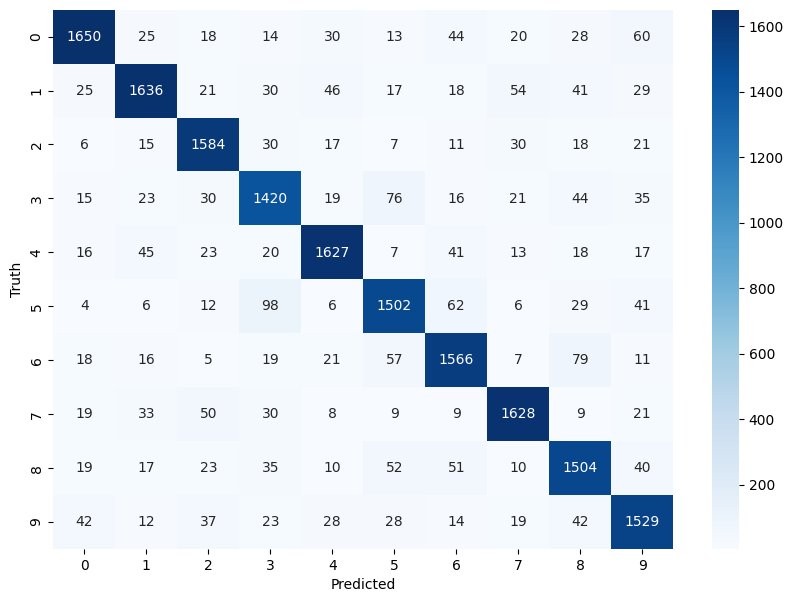

In [80]:
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(model.predict(X_test).argmax(axis=1), y_test.argmax(axis=1)), annot=True, fmt='d', cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Truth');

#### D. Plot the training loss, validation loss vs number of epochs and training accuracy, validation accuracy vs number of epochs plot and write your observations on the same. [4 Marks]

In [81]:
loss, accuracy  = model.evaluate(X_train, y_train, verbose=False)

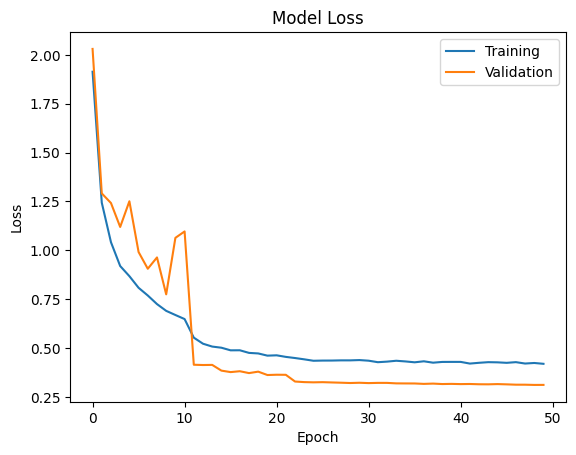

In [82]:
# Plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='best')
plt.show()

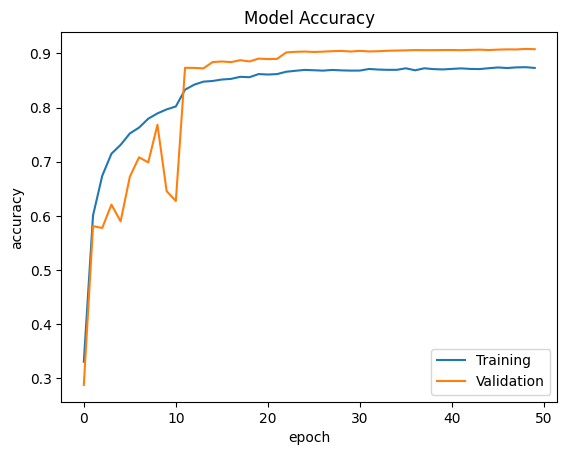

In [83]:
# Plot accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Training', 'Validation'], loc='best')
plt.show()

#### Summary

1. We observe until 15 epochs, though the training accuracy was gradually increasing, but the validation accuracy is fluctuating. After 15 epochs, both training and validation accuracy was getting stable around 90%. This is good accuracy for the model.
2. We observe similar trend for the loss. Loss was gradually getting reduced for the training set, but there was huge fluctuations in the validation set until about 10 epochs. After that, both losses become stable.
3. We achieved 92% accuracy on the training set, 91% accuracy on the validation set and 87% accuracy on the test set.
4. 87% accuracy on the test set is great because, model has not seen this data during the training.
5. Using batch normalisation and dropouts helped to improve the accuracy by a few percents.
6. By looking at the confusion matrix, it is understandable that numbers are classified well for most of the images